# 6. 지도 학습 : 분류

- 지도 학습 : 회귀 + 분류

- 회귀 : 목표 데이터 = "연속된 수치

    - 목표 데이터의 예측 값을 출력하는 함수

- 분류(Classification) : 목표 데이터 = "클래스"

    - E.g. {0: 과일 , 1: 야채, 2: 곡물} > 정수를 할당할 수 있지만 순서는 의미 없는 카테고리

    - 확률을 출력하는 함수 고려 > 확률의 개념을 도입함으로써 예측의 '불확실성'을 정량적으로 다룰 수 있음.


## 6.1 1차원 입력 2클래스 분류

- 입력 정보 : 1차원 

- 분류할 클래스 : 2가지

### 6.1.1.문제 설정

- 1차원 : '입력 변수' $x_n$ / '목표 변수' $t_n$ / $n$ = 데이터의 인덱스

- $t_n$ : 0 또는 1만을 갖는 변수 > 클래스 0이면 0, 클래스 1이면 1을 가짐

    - 분류에서 $t_n$ : '클래스', '카테고리', '라벨'

- 행렬 표기법($N$ : 데이터의 크기)

$$
\mathbf{X} =
\begin{bmatrix}
x_0 \\
x_1 \\
\vdots \\
x_{N-1}
\end{bmatrix}, \quad
\mathbf{T} =
\begin{bmatrix}
t_0 \\
t_1 \\
\vdots \\
t_{N-1}
\end{bmatrix}
$$



- 곤충 N마리의 데이터 : x_n = 무게, t_n = 성별(0 : 암컷, 1 : 수컷) 

- 데이터를 기초로 무게를 통해 성별을 예측하는 모델을 만드는 것이 목적


In [3]:
# List 6-1-1

# 곤충 N마리의 데이터 : x_n = 무게, t_n = 성별(0 : 암컷, 1 : 수컷) 
# 데이터를 기초로 무게를 통해 성별을 예측하는 모델을 만드는 것이 목적

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# 데이터 생성 ---
np.random.seed(seed=0)  # 난수 고정
X_min = 0
X_max = 2.5
X_n = 30
X_col = ['cornflowerblue', 'gray']
X = np.zeros(X_n)       # 입력 데이터
T = np.zeros(X_n, dtype=np.uint8)       # 목표 데이터
Dist_s = [0.4, 0.8]     # 분포의 시작 지점
Dist_w = [0.8, 1.6]     # 분포의 폭
Pi = 0.5        # 클래스 0의 비율(암컷이 될 확률)
for n in range(X_n):
    wk = np.random.rand()
    T[n] = 0 * (wk < Pi) + 1 * (wk >= Pi)       # (A)
    X[n] = np.random.rand() * Dist_w[T[n]] + Dist_s[T[n]]       # (B)

# 데이터 표시 ---
print('X=' +str(np.round(X, 2)))
print('T=' +str(T))


X=[1.94 1.67 0.92 1.11 1.41 1.65 2.28 0.47 1.07 2.19 2.08 1.02 0.91 1.16
 1.46 1.02 0.85 0.89 1.79 1.89 0.75 0.9  1.87 0.5  0.69 1.5  0.96 0.53
 1.21 0.6 ]
T=[1 1 0 0 1 1 1 0 0 1 1 0 0 0 1 0 0 0 1 1 0 1 1 0 0 1 1 0 1 0]


- 실행 시 30개의 무게 데이터 X와 성별 T 생성된다

1. 수컷과 암컷을 확률적으로 결정 > 암컷이 될 확률 Pi=0.5로 하여 무작위로 결정한다 (A)

2. True = 1, False = 0 이므로 wk를 0~1의 난수로 정한 후, 

    - $T[n] = (w_k < P_i) * 0 + (w_k \geq P_i) * 1$ 
    
    - wk < Pi : True, 1이 되고 = T[n] = 1x0 + 0x1 = 0이 되고

    - wk $\geq$ Pi : True, 1이 되고 T[n] = 0x0 + 1x1 = 1이 되는 구조이다.

![스크린샷 2024-07-11 17.43.36.png](<attachment:스크린샷 2024-07-11 17.43.36.png>)

- 암컷이라면, Dist_s[0] = 0.4에서 폭 Dist_w[0] = 0.8(0.4~1.2)의 균일한 분포에서 질량을 샘플링

- 수컷이라면, Dist_s[0] = 0.8에서 폭 Dist_w[0] = 1.6(0.8~2.4)의 균일한 분포에서 질량을 샘플링 
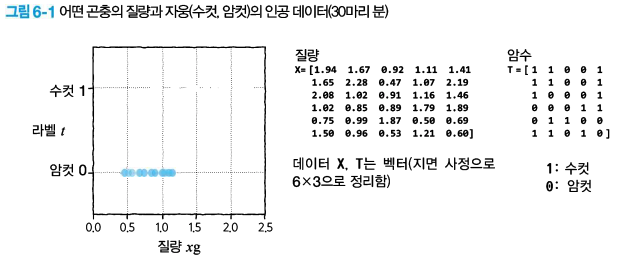

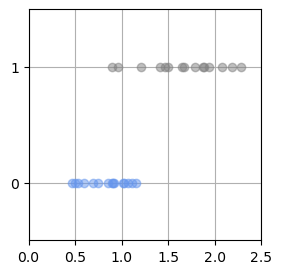

In [5]:
# List 6-1-2

# 데이터 분포 표시 ---
def show_data1(x, t):
    K = np.max(t) + 1
    for k in range(K):      # (A)
        plt.plot(x[t==k], t[t==k], X_col[k], alpha=0.5, linestyle='none', marker='o')   # (B)
        # linestyle='none' : 선 스타일 없음(점으로 표시) / linestyle='None' : 기본 선 스타일 적용
        plt.grid(True)
        plt.ylim(-.5, 1.5)
        plt.xlim(X_min, X_max)
        plt.yticks([0,1])

# Main ---
fig = plt.figure(figsize=(3,3))
show_data1(X, T)
plt.show()

- (B) : 분포를 표시하는 코드 > 이 코드는 K 루프 안에 있다(A)

- 처음 $k = 0$의 처리 : $t==0$일 때, $x$와 $t$만을 추출하여 플롯하는 명령

- $x[t==0]$ : $t==0$을 채우는 요소 번호 $x$가 추출되므로 편리

![스크린샷 2024-07-11 17.53.47.png](<attachment:스크린샷 2024-07-11 17.53.47.png>)

- 문제를 푸는 방침 : 수컷과 암컷을 분리하는 경계선 결정 = 결정 경계(Decision boundary)

    - 새로운 질량 데이터가 결정 경계보다 작으면 '암컷', 크다면 '수컷'으로 예측

- 결정 경계 정하기 

    1. 5장의 선형 회귀 모델 사용 : 클래스를 '0'과 '1'의 값으로 해석하여 데이터의 분포에 직선을 맞춤
        
        - 확실하게 수컷으로 판정할 수 있는 데이터 점에서도 직선이 겹쳐져 있지 않기에 오차가 발생할 수 있음(직선으로 정확히 분리 x)
        
        - 이 오차를 해소하려는 힘이 작용하기에 결정 경계가 수컷쪽으로 끌려감 > 빗나간 값이 클수록 심각

![스크린샷 2024-07-11 17.57.10.png](<attachment:스크린샷 2024-07-11 17.57.10.png>)
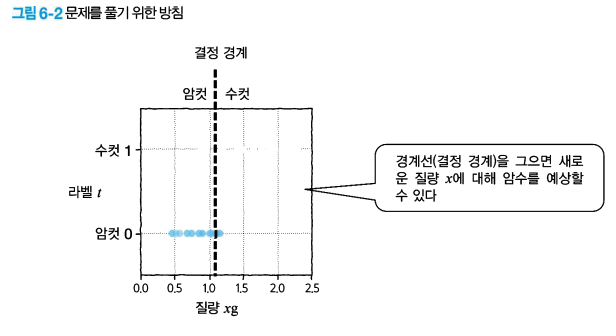
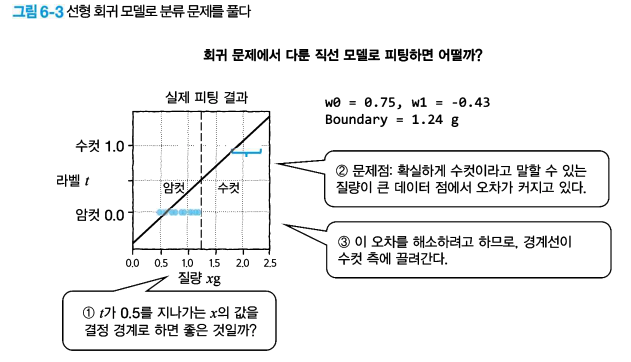

### 6.1.2. 확률로 나타내는 클래스 분류



- 선형 모델을 분류 문제에 적용하는 것이 어려웠기에, 확률로 도전

- 인공 데이터로 데이터를 생성했기에 실제 데이터의 분포를 알고 있다

- 인공 데이터 : x < 0.8g(암컷) / 1.2g < x(수컷) / 0.8g $\le$ x $\le$ 1.2g(???)

![스크린샷 2024-07-11 18.03.04.png](<attachment:스크린샷 2024-07-11 18.03.04.png>)

- 0.8g $\le$ x $\le$ 1.2g 구간에서 암컷의 데이터가 수컷의 데이터의 2배 

    - 겹쳐진 $x$의 범위에서 무작위로 데이터를 선택하면, '수컷일 확률' = 1/3

- 수컷일 확률은 $x$에 따라 달라짐 

    - $x$ < 0.8g : 확률은 0

    - 1.2g < $x$ : 확률은 1

- 이 같은 $x$에 대해 $t=1$(수컷) 일 확률은 조건부 확률을 사용하여 표현($x$의 함수)

- $$P(t=1|x)$$

    - 주어진 입력 데이터 x가 주어졌을 때, 클래스 t=1일 확률

    

    - 이 조건부 확률의 계단형 그래프는 클래스 분류의 답을 나타냄 

    - 어떤 클래스로 분류할지 명확하게 예측할 수 없는 불확실한 영역도 확률적인 예측으로 표현

- 결정 경계 : $P(t=1|x)=0.5$가 되는 $x$ 가 결졍 경계 이므로 이 예에서는 $x = 1.2$ (두 클래스를 분리하는 지점) 
    
    - 이 지점이 두 클래스 간의 예측에서 가장 불확실한 지점이다.

- 지금까지의 논의는 '확률로 나타내는 것이 낫다'는 것을 설명하기 위해 데이터의 실제 분포를 알고 있다는 특수한 상황을 가정

- 실제로는 데이터의 분포를 미리 알지 못함. 분포를 알지 못한 상태에서 데이터를 통해 분포를 추정해야 합니다.

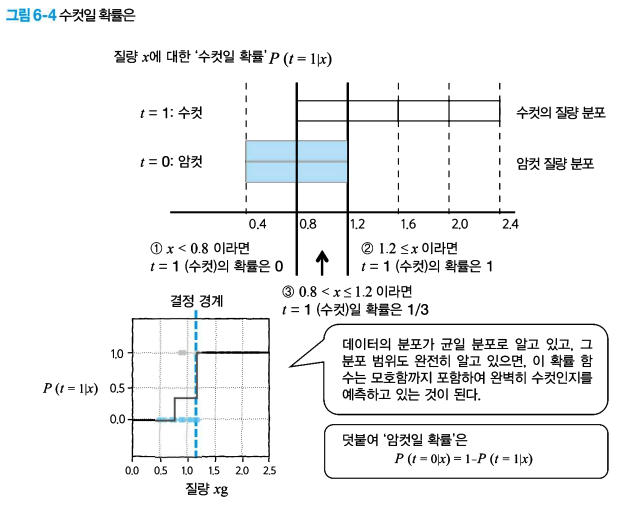

### 6.1.3. 최대가능도법(Maximum Likelihood Estimation, MLE)



- 개념 : 주어진 데이터가 관찰될 확률을 최대화하는 파라미터를 찾는 방법 

- 목표 : 우리가 관찰할 데이터를 가장 잘 설명할 수 있는 확률 분포를 찾는 것

앞의 예에서는 $0.8 < x < 1.2$일 때, $P(t = 1|x) = \frac{1}{3}$임을 실제 분포 정보에서 해석적인 방법으로 계산했다. 

그러나 실제로 이 값은 데이터로부터 추정

예제
  - $0.8 < x < 1.2$ 범위에 있는 $x$에 주목하여, 처음 3회는 $t = 0$이며, 4회째는 $t = 1$이었다고 가정
  - 이 정보에서 $0.8 < x < 1.2$로 $P(t = 1|x)$를 추정

$$ P(t = 1|x) = w $$

- 확률 $w$에서 $t = 1$을 생성하는 모델 ($w$의 범위는 0에서 1 사이)
- 이 모델이 $T = 0, 0, 0, 1$이라는 데이터를 생성했다고 가정

예제
  - $w = 0.1$일 경우의 가능도:
    - $w = P(t = 1|x) = 0.1$
    - $t = 1$일 확률은 0.1, $t = 0$일 확률은 $1 - 0.1 = 0.9$
    - $T = 0, 0, 0, 1$일 확률 = $0.9 \times 0.9 \times 0.9 \times 0.1 = 0.0729$

  - $w = 0.2$일 경우의 가능도:
    - $w = P(t = 1|x) = 0.2$
    - $t = 1$일 확률은 0.2, $t = 0$일 확률은 $1 - 0.2 = 0.8$
    - $T = 0, 0, 0, 1$일 확률 = $0.8 \times 0.8 \times 0.8 \times 0.2 = 0.1024$

  - 따라서, $w = 0.2$가 가능도가 더 높기 때문에, $w = 0.2$가 더 적합한 값이다.

$$ P(T = 0, 0, 0, 1|x) = (1 - w)^3 w $$

- $w$는 0에서 1까지의 범위에서 위의 수식 값을 최대화하는 $w$를 찾음
- 그래프로 그리면 위로 솟은 산 같은 형태
- 이 산의 최대치를 갖는 $w$가 가장 적합한 값이 된다 > 이것이 '최대가능도법'

![스크린샷 2024-07-11 18.28.52.png](<attachment:스크린샷 2024-07-11 18.28.52.png>)

- $ P(T = 0, 0, 0, 1|x) = (1 - w)^3 w $ 가 최대치를 갖는 w > 연속된 곱셈 이므로 양변에 $log$ 취함

    - 로그를 취한 가능도 = 로그 가능도 : MSE 대신 사용되는 확률 세계의 목적 함수

        - 대신 사용되는 이유 : 곱셈을 덧셈으로 변환/수치적 안정성(매우 작은 값들의 언더플로우 문제 완화)

            - 목적 함수로서의 적합성(MLE에서 가능도를 최대화하는 것은 로그 가능도를 최대화하는 것과 동일)

MSE와 로그 가능도

- MSE (Mean Squared Error)

    - MSE는 예측값과 실제값 간의 차이의 제곱 평균입니다.

    - $\text{MSE} = \frac{1}{n} \displaystyle\sum_{i=1}^{n} (y_i - \hat{y}_i)^2 $

    - 여기서  $y_i$ 는 실제값,  $\hat{y}_i$ 는 예측값입니다. 주로 회귀 분석에서 사용됩니다.

    - 최소화하는 매개 변수 찾음

- 로그 가능도 (Log-Likelihood)

    - 로그 가능도는 데이터가 모델에 의해 생성될 로그 확률의 합입니다.

    - $\log L(\theta) = \displaystyle\sum_{i=1}^{n} \log P(y_i | \theta)  $

    - 주어진 $\theta$에서 $y$가 관찰 될 확률


    - 여기서  $\theta$ 는 모델 파라미터,  $P(y_i | \theta)$ 는 모델에 의해 예측된 확률입니다. 확률 모델의 적합성을 평가하는 데 사용됩니다.

    - 최대화하는 매개 변수 찾음

![스크린샷 2024-07-12 08.28.06.png](<attachment:스크린샷 2024-07-12 08.28.06.png>)

- 풀이

$$\frac{\partial}{\partial w} \log P = \frac{\partial}{\partial w} [3 \log(1 - w) + \log w] = 0$$

$$3 \left(\frac{-1}{1 - w}\right) + \frac{1}{w} = 0$$

$$\frac{-3w + 1 - w}{(1 - w)w} = 0$$

- 0 < w < 1의 범위에서 답을 생각하면 분모가 0이 되지 않기 때문에, 양변에 $(1 - w)w$를 곱하면

$$-3w + 1 - w = 0$$

$$w = \frac{1}{4}$$
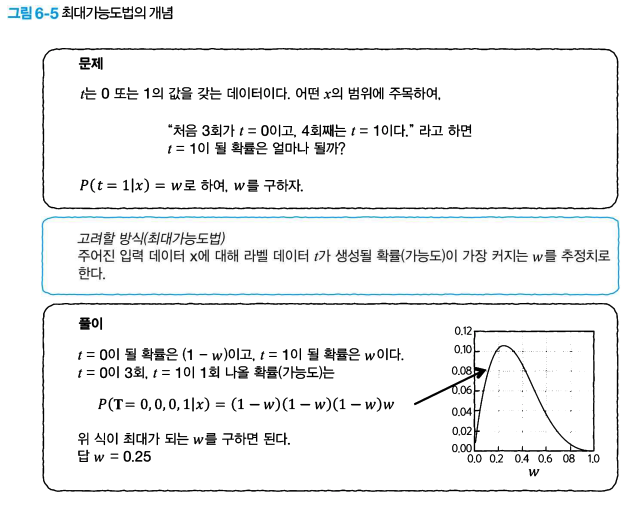
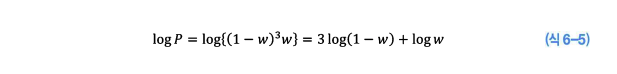

- T = 0, 0, 0, 1가 생성될 가능성이 가장 높은 모델의 매개 변수는 $w = 1/4$, 이것이 $w$의 최대가능도값

- $x$가 $0.8 \le x \le 1.2$의 범위에 있을 때 확률이 일정하다는 지식을 이용했기에 아쉽

### 6.1.4. 로지스틱 회귀 모델



- 위의 예제는 데이터를 균일한 분포에서 생성된 것으로 생각 > 앞의 계단식 함수 보다 가우스 함수 쪽이 실제 분포 더 잘 표현

- 가우스 분포에서 조건부 확률 $P(t = 1|x)$는 로지스틱 회귀 모델로 나타냄
    
    -로지스틱 회귀 모델은 입력 데이터가 특정 클래스에 속할 확률을 출력하기에 분류 문제에 유용

- 로지스틱 회귀 모델은 $y = w_o x + w_1$ 을 시그모이드 함수인 $\sigma(x) = \frac{1}{1 + \exp(-x)}$ 에 넣은 것

$$y = w_0 x + w_1$$


$$y = \sigma(w_0 x + w_1) = \frac{1}{1 + \exp \{-(w_0 x + w_1)\}}$$

- 직선 모델의 큰 양의 출력 : 1에 가까운 값 / 절대값이 큰 음의 출력 : 0에 가까운 값으로 변환 > 직선의 함수는 0~1 범위에 들어감

![스크린샷 2024-07-11 18.47.05.png](<attachment:스크린샷 2024-07-11 18.47.05.png>)
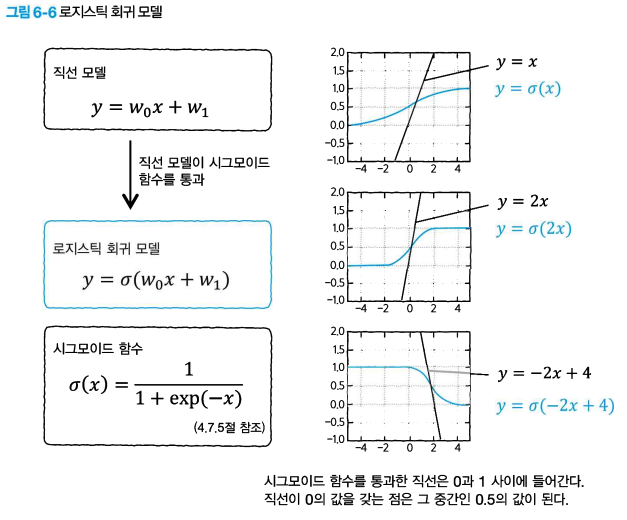

1.25

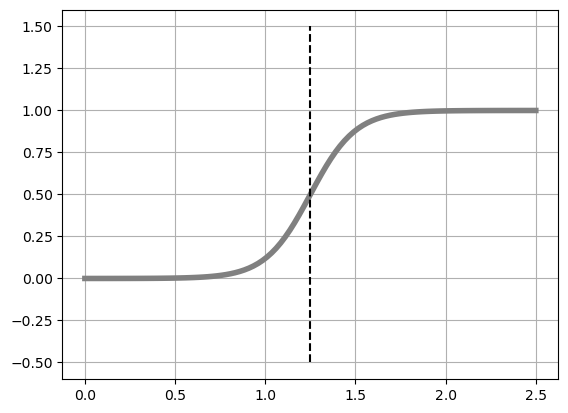

In [7]:
# List 6-1-3

# 로지스틱 회귀 모델 정의
def logistic(x, w):
    y = 1 / (1+ np.exp(-(w[0] * x + w[1])))
    return y

# List 6-1-4

# 로지스틱 회귀 모델를 결정 경계와 함께 표시하는 함수 > 모델과 결정 경계와 결정 경계의 값 출력
def show_logistic(w):
    xb = np.linspace(X_min, X_max, 100)
    y = logistic(xb, w)
    plt.plot(xb, y, color='gray', linewidth=4)
    # 결정 경계 ---
    i = np.min(np.where(y > 0.5))       # (A)
    B = (xb[i-1] + xb[i]) / 2       # (B)
    plt.plot([B, B], [-.5, 1.5], color = 'k', linestyle='--')
    plt.grid(True)
    return B

# test
W = [8, -10]
show_logistic(W)

[리스트 6-1-(4)]의 (A)와 (B)에서 결정 경계를 구하고 있다. 결정 경계는 $y = 0.5$가 되는 $x$의 값

(A)의 $np.where(y > 0.5)$은 $y > 0.5$를 만족하는 요소 번호를 모두 반환하는 명령문

$i = np.min(np.where(y > 0.5))$
명령으로 $y > 0.5$를 만족하는 요소 번호 중에서 가장 작은 인덱스가 $i$에 들어간다.
즉, $i$는 $y > 0.5$를 넘는 직후의 요소 번호

(B)의 
$B = \frac{(xb[i - 1] + xb[i])}{2}$
로, $y > 0.5$를 넘는 직후의 $xb[i]$와, 그 직전의 $xb[i - 1]$의 평균이 결정 경계의 근사치로서 $B$에 저장

### 6.1.5. 교차 엔트로피 오차



- 로지스틱 회귀 모델을 통해 $x$가 $t=1$이 될 확률 : $y = \sigma(w_0 x + w_1) = P(t = 1 | x)$

- 매개 변수 $w_0$과 $w_1$이 곤충의 데이터에 맞도록 최대가능도법 활용 > 이 모델에서 곤충의 데이터가 생성될 가능성이 확률적으로 가장 높은 매개 변수를 구한다

1. 곤충의 데이터가 이 모델에서 생성된 확률, 가능도를 구한다

    - 데이터가 하나뿐이라고 가정

        - 무게 x에 대해 $t=1$ : $t=1$이 모델에서 생성될 확률 = 로지스틱 회귀 모델의 출력치 $y$
        
        - $t=0$ 확률이므로 $1-y$

- 클래스의 생성 확률 : $P(t|x) = y^t (1 - y)^{1 - t}$ 

- t=1의 경우 : $P(t = 1|x) = y^1 (1 - y)^{1 - 1} = y$ 
- t=0의 경우 : $P(t = 0|x) = y^0 (1 - y)^{1 - } = 1-y$ 
- 데이터가 $N$개라면 주어진 $X = x_0, \cdots, x_{N-1}$에 대한 클래스 $T = t_0, \cdots, t_{N-1}$의 생성 확률?

    - 하나하나의 데이터 생성 확률을 모든 데이터에 곱하면 됨 > 이것이 가능도 함수 ???
    
 
    - $P(T|X) = \displaystyle\prod_{n=0}^{N-1} P(t_n|x_n) = \displaystyle\prod_{n=0}^{N-1} y_n^{t_n} (1 - y_n)^{1 - t_n}$ 
- 대수를 취하고 로그 가능도 얻음 > 매개 변수 $w_0, w_1$은 이 로그 가능도가 최대가 되도록 구함

    - $ \log P(T|X) = \displaystyle \sum_{n=0}^{N-1} \{ t_n \log y_n + (1 - t_n) \log (1 - y_n) \} $



- 교차 엔트로피 오차(Cross-entropy error function) 
    - MSE가 최소가 되도록 매개 변수를 구하고 있었으므로 그것과 맞추기 위해 위의 식에 -1 곱함(손실 함수가 최소화 되어야 하기에)
    - MSE와 마찬가지로 오차가 '최소'가 되는 매개 변수 구하면 된다.

- 교차 엔트로피를 N으로 나눈 "평균 교체 엔토르피 오차"를 $E(w)$로 정의 
    - 데이터 개수를 줄여 데이터가 커짐에 따라 오차가 커질 수 있는 영향을 제거
    - 데이터 셋의 크기에 관계없이 공정한 비교 가능
    - 데이터 포인트의 기여가 균등하게 반영 > 학습 속도를 일정하게 유지
    - 그래디언트 계산 시 값이 너무 크거나 작아지는 문제 방지 > 최적화 과정의 안정성 높임

    - $ E(w) = - \frac{1}{N} \log P(T|X) = - \frac{1}{N} \sum_{n=0}^{N-1} \{ t_n \log y_n + (1 - t_n) \log (1 - y_n) \} $ 

In [8]:
# List 6-1-5

# 평균 교체 엔트로피 오차 ---
def cee_logistic(w, x, t):      # 평균 교차 엔트로피 오차 계산 함수
    y = logistic(x, w)
    cee = 0
    for n in range(len(y)):
        cee = cee - (t[n] * np.log(y[n]) + (1 - t[n]) * np.log(1-y[n]))
    cee = cee / X_n
    return cee

# test 
W=[1,1]
cee_logistic(W, X, T)

1.0288191541851066

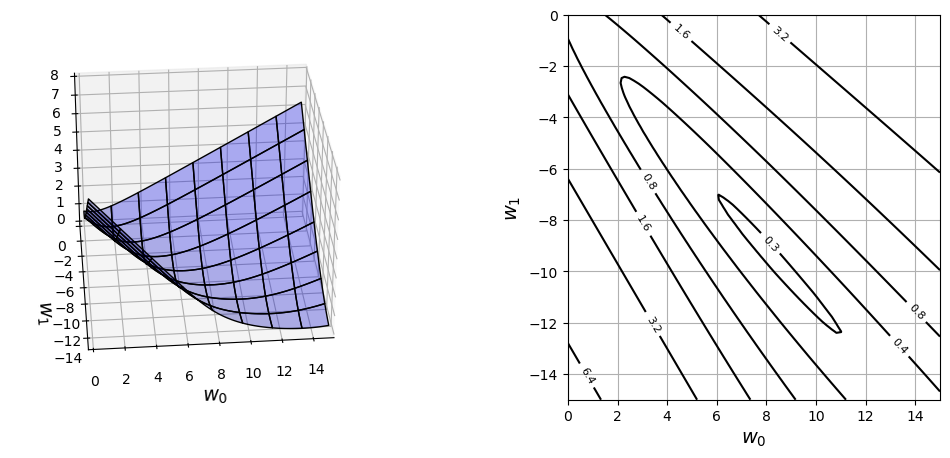

In [10]:
# List 6-1-6

# 평균 교차 엔트로피 오차의 모양 확인
# 계산 ---
xn = 80     # 등고선 표시 해상도
w_range = np.array([[0, 15], [-15, 0]])
x0 = np.linspace(w_range[0,0], w_range[0,1], xn)
x1 = np.linspace(w_range[1,0], w_range[1,1], xn)
xx0, xx1 = np.meshgrid(x0, x1)
C = np.zeros((len(x1), len(x0)))
w = np.zeros(2)
for i0 in range(xn):
    for i1 in range(xn):
        w[0] = x0[i0]
        w[1] = x1[i1]
        C[i1, i0] = cee_logistic(w, X, T)
        
# 표시 ---
plt.figure(figsize=(12, 5))
# plt.figure(figsize=(9.5, 4))
plt.subplots_adjust(wspace=0.5)
ax = plt.subplot(1, 2, 1, projection='3d')
ax.plot_surface(xx0, xx1, C, color='blue', edgecolor='black',
                rstride=10, cstride=10, alpha=0.3)
ax.set_xlabel('$w_0$', fontsize=14)
ax.set_ylabel('$w_1$', fontsize=14)
ax.set_xlim(0, 15)
ax.set_ylim(-15, 0)
ax.set_zlim(0, 8)
ax.view_init(30, -95)

plt.subplot(1, 2, 2)
cont = plt.contour(xx0, xx1, C, 20, colors='black',
                   levels=[0.26, 0.4, 0.8, 1.6, 3.2, 6.4])
cont.clabel(fmt='%1.1f', fontsize=8)
plt.xlabel('$w_0$', fontsize=14)
plt.ylabel('$w_1$', fontsize=14)
plt.grid(True)
plt.show()

- 최소치는 $w_0 = 9$, $w_1 = -9$ 근처에 존재

### 6.1.6. 학습 규칙의 도출



- $y_n$이 비선형의 시그모이드 함수를 포함하기에 교차 엔트로피 오차를 최소화하는 매개 변수의 분석해는 구할 수 없다
    - 비선형 함수의 극값을 구하기 어려움(분석해 x)
- 경사 하강법으로 구함 > 매개 변수를 편미분 > $E(w)$를 $w_0$으로 편미분

- $E(w) = \frac{1}{N} \sum_{n=0}^{N-1} E_n(w)$ 

- $E_n(w) = -t_n \log y_n - (1 - t_n) \log (1 - y_n)$

- $\frac{\partial}{\partial w_0} E(w) = \frac{1}{N} \sum_{n=0}^{N-1} \frac{\partial}{\partial w_0} E_n(w)$ 

![스크린샷 2024-07-12 08.38.46.png](<attachment:스크린샷 2024-07-12 08.38.46.png>)

- 합의 기호의 내용을 $\frac{\partial}{\partial w_0} E_n(w)$를 구하고 나서, 마지막에 그 평균을 계산하여 $\frac{\partial}{\partial w_0} E(w)$를 구하는 방식을 고려

![스크린샷 2024-07-12 08.40.50.png](<attachment:스크린샷 2024-07-12 08.40.50.png>)

![스크린샷 2024-07-12 08.41.22.png](<attachment:스크린샷 2024-07-12 08.41.22.png>)

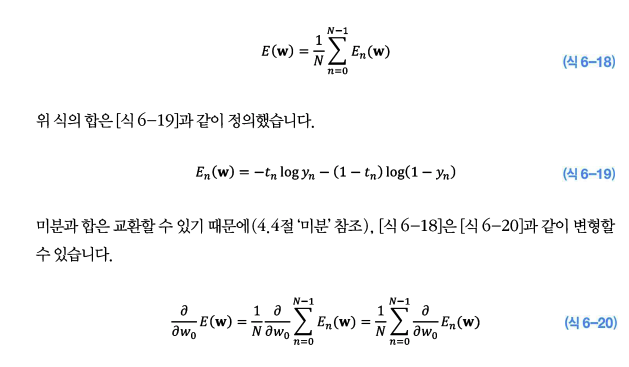
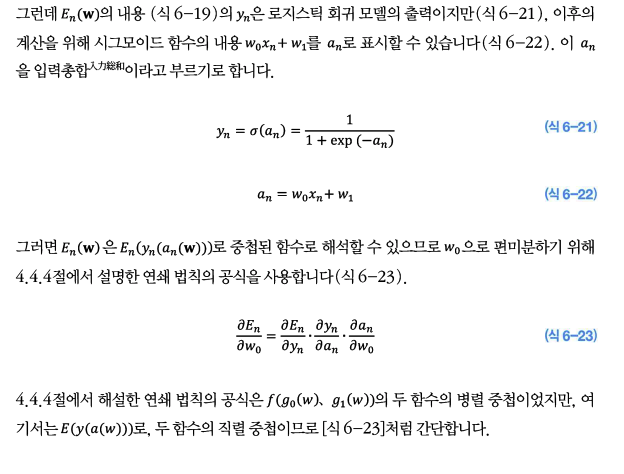
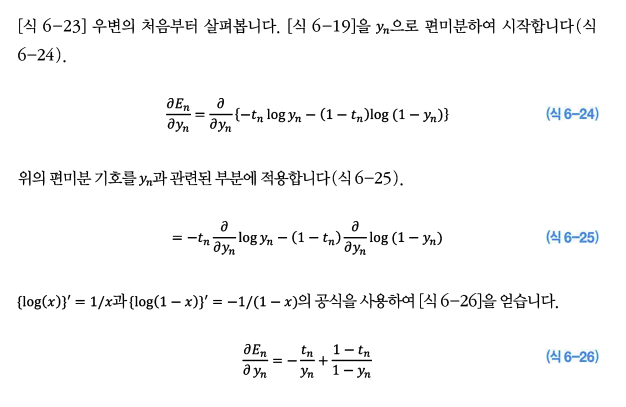

![스크린샷 2024-07-11 19.30.06.png](<attachment:스크린샷 2024-07-11 19.30.06.png>)
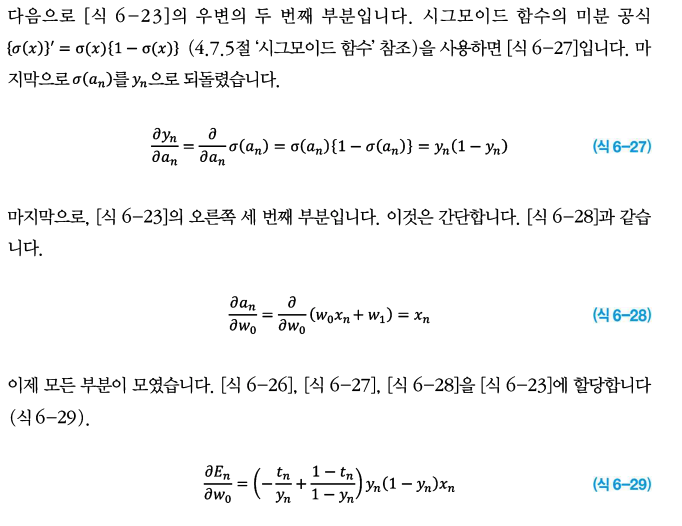

![스크린샷 2024-07-11 19.30.46.png](<attachment:스크린샷 2024-07-11 19.30.46.png>)


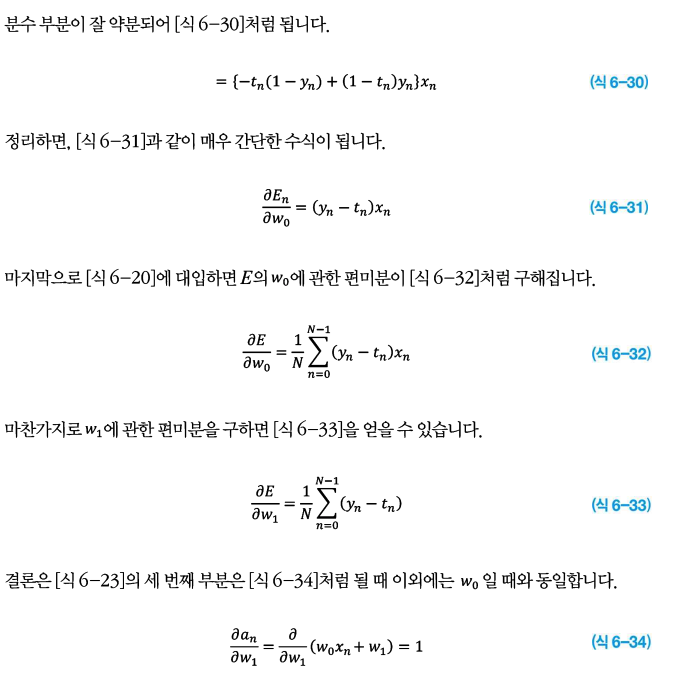

In [11]:
# List 6-1-7

# 평균 교차 엔트로피 오차의 미분 ---
def dcee_logistic(w, x, t):
    y = logistic(x, w)
    dcee = np.zeros(2)
    for n in range(len(y)):
        dcee[0] = dcee[0] + (y[n] - t[n]) * x[n]
        dcee[1] = dcee[1] + (y[n] - t[n])
    dcee = dcee / X_n
    return dcee

# --- test
W = [1, 1]
dcee_logistic(W, X, T)


array([0.30857905, 0.39485474])

- $w_0 =1, w_1 = 1$을 입력하고 동작 확인
- 출력은 $w_0$ 방향의 편미분 값과 $w_1$방향의 편미분 값을 요소로 갖는 ndarray 배열

![스크린샷 2024-07-11 19.33.20.png](<attachment:스크린샷 2024-07-11 19.33.20.png>)
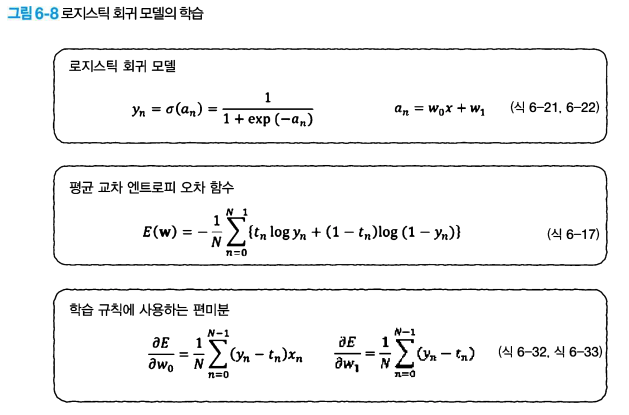

### 6.1.7. 경사 하강법에 의한 해



w0 = 8.18, w1 = -9.38
CEE = 0.25
Boundary = 1.15 g


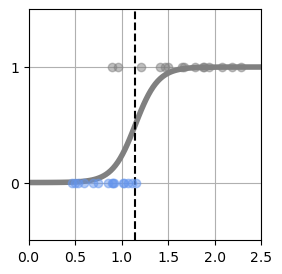

In [12]:
# List 6-1-8

from scipy.optimize import minimize

# scipy.optimize 라이브러리에 포함된 minimize() 함수로 경사 하강법 시도 (A)
# 학습률을 내부에서 자동으로 설정해줌
# 매개 변수 검색
def fit_logistic(w_init, x, t):
    res1 = minimize(cee_logistic, w_init, args=(x, t), jac=dcee_logistic, method="CG")  # (A)
    return res1.x

# 메인 ---
plt.figure(1, figsize=(3, 3))
W_init = [1, -1]
W = fit_logistic(W_init, X, T)
print("w0 = {0:.2f}, w1 = {1:.2f}".format(W[0], W[1]))
B = show_logistic(W)
show_data1(X, T)
plt.ylim(-0.5, 1.5)
plt.xlim(X_min, X_max)
cee = cee_logistic(W, X, T)
print("CEE = {0:.2f}".format(cee))
print("Boundary = {0:.2f} g".format(B))
plt.show()

- minimize()의 인수로는 교차 엔트로피의 함수 cee_logistic

- w의 초기값 w_init

- args(x, t)에는 cee_logistic의 w 이외의 인수

- jac=dcee_logistic에는 미분 함수를 지정하고 method="CG"로 켤레 기울기법 이라는 경사 하강법의 일종을 지정

 - 켤레 기울기법은 경사 하강법의 개선된 버전으로, 각 단계에서 이전 기울기 정보를 활용하여 더 효율적인 방향으로 이동합니다. 이를 통해 더 빠르게 수렴하고, 특히 대규모 최적화 문제에서 메모리 사용을 줄일 수 있습니다. 주로 대규모의 이차 형식 문제나 대규모의 비선형 함수의 최소화를 위해 사용됩니다. 
       


![스크린샷 2024-07-11 19.42.24.png](<attachment:스크린샷 2024-07-11 19.42.24.png>)
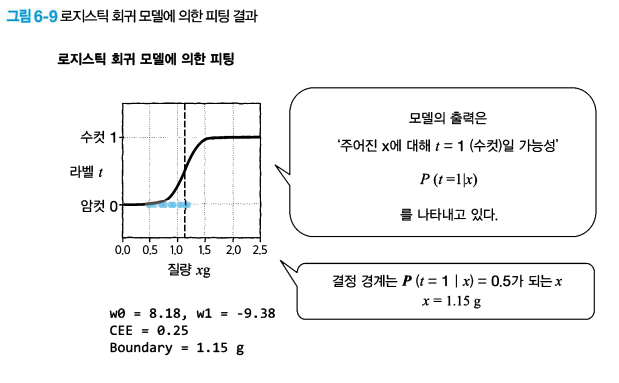

- 이 모델의 장점은 출력 값이 $P(t=1|x)$라는 조건부 확률(사후 확률)을 근사하려는 점이며, 모델이 특정 클래스에 속할 확률을 제공함으로써, 모델의 확신 정도를 표현할 수 있게 한다. 즉, 모호성을 포함하여 예측하는 점이다

## 6.2 2차원 입력 2클래스 분류


### 6.2.1. 문제 설정


In [13]:
# 재설정 
%reset

In [24]:
# List 6-2-1

# 2클래스의 분류, 3클래스의 분류 데이터 함께 만듦

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# 데이터 생성 ----------------------------------------------
np.random.seed(seed=1)  # 난수를 고정하여 재현성 확보
N = 100  # 데이터의 수
K = 3  # 분포 수
T3 = np.zeros((N, 3), dtype=np.uint8)  # N x 3 배열 생성 및 초기화 (0으로)
T2 = np.zeros((N, 2), dtype=np.uint8)  # N x 2 배열 생성 및 초기화 (0으로)
X = np.zeros((N, 2))  # N x 2 배열 생성 및 초기화 (0으로)
X_range0 = [-3, 3]  # X0 범위 표시용
X_range1 = [-3, 3]  # X1 범위 표시용
Mu = np.array([[-.5, -.5], [.5, 1.0], [1, -.5]])  # 분포의 중심
Sig = np.array([[.7, .7], [.8, .3], [.3, .8]])  # 분포의 분산
Pi = np.array([0.4, 0.8, 1])  # 각 분포에 대한 비율 0.4, 0.8, 1
for n in range(N):  # N개의 데이터에 대해
    wk = np.random.rand()  # 난수 생성 (0과 1 사이의 값)
    for k in range(K):  # K개의 분포에 대해
        if wk < Pi[k]:  # 난수가 Pi[k]보다 작으면
            T3[n, k] = 1  # T3의 해당 위치에 1 할당
            break  # 내부 루프 탈출
    for k in range(2):  # 2개의 좌표에 대해
        X[n, k] = (np.random.randn() * Sig[T3[n, :] == 1, k]) + Mu[T3[n, :] == 1, k]
        # X[n, k]에 무작위 값 (표준 정규 분포에서 생성된 값 * 분산) + 중심 좌표 할당
        
# 2클래스 분류를 위해 각 분포를 조합
T2[:, 0] = T3[:, 0]  # 첫 번째 클래스는 첫 번째 분포와 동일
T2[:, 1] = T3[:, 1] | T3[:, 2]  # 두 번째 클래스는 두 번째 분포와 세 번째 분포의 OR 연산 결과

- 데이터의 수는 N=100 
- 입력 데이터는 Nx2의 X
- 2클래스 분류의 클래스 데이터는 Nx2의 T2
- 3클래스 분류 클래스 데이터는 Nx3의 T3에 저장

In [25]:
# List 6-2-2
print(X[:5,:])  # 입력 데이터의 첫 5개

[[-0.14173827  0.86533666]
 [-0.86972023 -1.25107804]
 [-2.15442802  0.29474174]
 [ 0.75523128  0.92518889]
 [-1.10193462  0.74082534]]


In [23]:
# List 6-2-3
print(T2[:5, :])  # 클래스 데이터 T2의 처음 5개

[[0 1]
 [1 0]
 [1 0]
 [0 1]
 [1 0]]


- 위에서 차례로 클래스 1, 0, 0, 1, 0에 속한다는 의미
- 1인 열 번호가 클래스 번호 나타냄

In [26]:
# List 6-2-4
print(T3[:5, :])  # 클래스 데이터 T3의 처음 5개

[[0 1 0]
 [1 0 0]
 [1 0 0]
 [0 1 0]
 [1 0 0]]


- T2와 마찬가지로 클래스 1 0 0 1 0 에 속함
- 위처럼 목적 변수 벡터 $t_n$의 $k$번째 요소만 1로, 그 외에는 0으로 표기하는 방법을 $1-of-K$ 부호화 라고 한다
    - 0 ~ K-1의 값을 가지는 정수 스칼라 값을 0 또는 1의 값을 가지는 K-차원 벡터로 변환

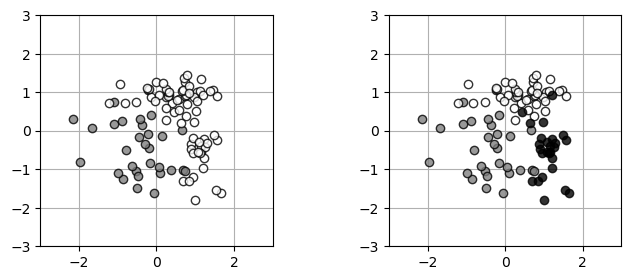

In [27]:
# List 6-2-5

# T2 T3 그림 그리기
# 데이터 표시 ---
def show_data2(x, t):  # 데이터와 라벨을 인수로 받는 함수 정의
    wk, K = t.shape  # t의 형태에서 K값 추출
    c = [[.5, .5, .5], [1, 1, 1], [0, 0, 0]]  # 색상 설정 (3가지 색)
    for k in range(K):  # 각 클래스에 대해 반복
        plt.plot(x[t[:, k] == 1, 0], x[t[:, k] == 1, 1],  # x 배열에서 클래스 k에 해당하는 데이터 선택
                 linestyle='none', markeredgecolor='black',  # 선 없음, 마커의 테두리 색은 검정
                 marker='o', color=c[k], alpha=0.8)  # 마커는 동그라미, 마커 색상은 c[k], 투명도는 0.8
    plt.grid(True)  # 격자 표시

# 메인 ----
plt.figure(figsize=(7.5, 3))  # 그림 크기 설정
plt.subplots_adjust(wspace=0.5)  # 서브플롯 간 간격 조정
plt.subplot(1, 2, 1)  # 1행 2열의 첫 번째 서브플롯 설정
show_data2(X, T2)  # 2클래스 데이터 표시
plt.xlim(X_range0)  # x축 범위 설정
plt.ylim(X_range1)  # y축 범위 설정

plt.subplot(1, 2, 2)  # 1행 2열의 두 번째 서브플롯 설정
show_data2(X, T3)  # 3클래스 데이터 표시
plt.xlim(X_range0)  # x축 범위 설정
plt.ylim(X_range1)  # y축 범위 설정
plt.show()  # 그림 표시

- 데이터는 3클래스용 T3을 만들고 클래스 2를 클래스 1에 통합하여 T2로 하고 있다.  ???
- 데이터 생성 
    - 어떤 클래스에 속하는 확률 : Pi=np.array([0.4, 0.8, 1]) (A)
    - 0~1 사이의 균일한 분포에서 난수를 생성하여 wk에 넣음
        - Pi[0]보다 작으면 클래스 0
        - Pi[1]보다 작으면 클래스 1
        - Pi[2]보다 작으면 클래스 2
    - 클래스가 결정된 뒤, 클래스마다 각각 가우스 분포로 입력 데이터를 생성

    ![스크린샷 2024-07-12 01.02.08.png](<attachment:스크린샷 2024-07-12 01.02.08.png>)
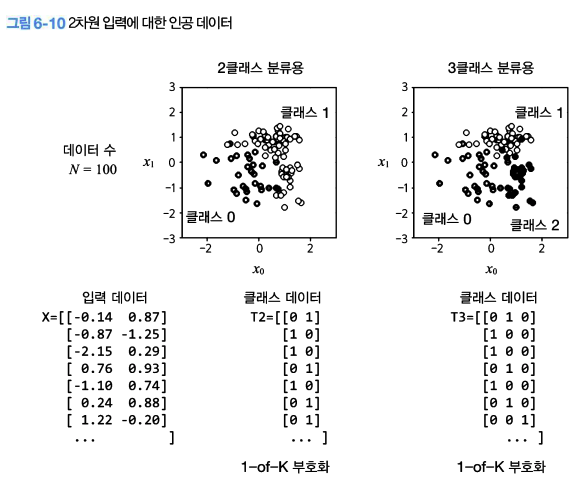

### 6.2.2. 로지스틱 회귀 모델


- 1차원 입력 버전
![스크린샷 2024-07-12 01.02.45.png](<attachment:스크린샷 2024-07-12 01.02.45.png>)

- 2차원 입력 버전
![스크린샷 2024-07-12 01.12.36.png](<attachment:스크린샷 2024-07-12 01.12.36.png>)
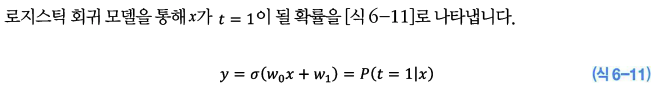
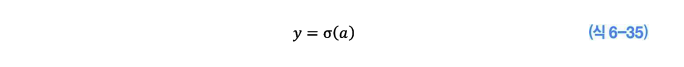

- 로지스틱 회귀 모델은 1차원 입력 버전에서 간단히 2차원 입력 버전으로 확장할 수 있습니다.

- a의 입력 총합 
$$ a = w_0 x_0 + w_1 x_1 +w_2$$ 

- 이번 모델의 출력 $y$는 클래스가 0인 확률 $P(t=0|x)$를 근사 > 모델의 매개 변수도 1차보다 하나 증가하여 $w_0, w_1, w_2$ 세 가지

![스크린샷 2024-07-12 01.15.37.png](<attachment:스크린샷 2024-07-12 01.15.37.png>)
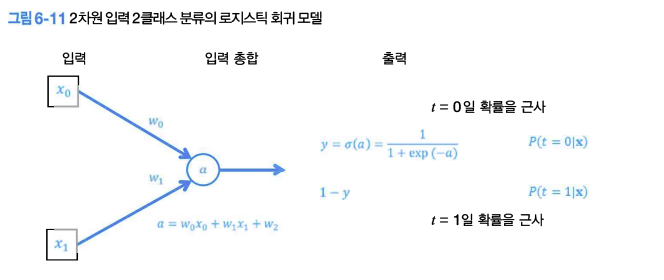

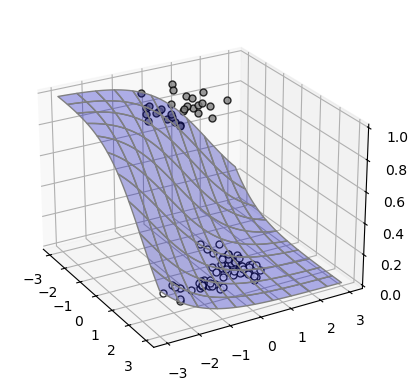

In [29]:
# List 6-2-6

# 로지스틱 회귀 모델 ---
def logistic2(x0, x1, w):
    y = 1 / (1 + np.exp(-(w[0] * x0 + w[1] * x1 + w[2])))
    return y

# List 6-2-7

# 모델과 데이터를 3D로 표시하기 위함 
# 실행 시, W =[-1, -1, 1]을 선택한 경우 2차원 로지스틱 회귀 모델과 데이터를 3차원으로 표시
# 모델 3D 보기 ---
from mpl_toolkits.mplot3d import axes3d  # 3D 플롯을 위한 모듈 임포트

def show3d_logistic2(ax, w):  # 3D 로지스틱 회귀 모델을 시각화하는 함수 정의
    xn = 50  # 50개의 포인트 사용
    x0 = np.linspace(X_range0[0], X_range0[1], xn)  # X0 범위 내 50개의 균등한 값 생성
    x1 = np.linspace(X_range1[0], X_range1[1], xn)  # X1 범위 내 50개의 균등한 값 생성
    xx0, xx1 = np.meshgrid(x0, x1)  # x0와 x1의 그리드 생성
    y = logistic2(xx0, xx1, w)  # 로지스틱 함수 적용하여 y 값 계산
    ax.plot_surface(xx0, xx1, y, color='blue', edgecolor='gray',  # 3D 표면 플롯 생성
                    rstride=5, cstride=5, alpha=0.3)  # 행, 열의 간격은 5, 투명도는 0.3

def show_data2_3d(ax, x, t):  # 3D 데이터 표시 함수 정의
    c = [[.5, .5, .5], [1, 1, 1]]  # 색상 설정 (2가지 색)
    for i in range(2):  # 두 클래스에 대해 반복
        ax.plot(x[t[:, i] == 1, 0], x[t[:, i] == 1, 1], 1 - i,  # 데이터 포인트 플롯
                marker='o', color=c[i], markeredgecolor='black',  # 마커는 동그라미, 색상은 c[i]
                linestyle='none', markersize=5, alpha=0.8)  # 선 없음, 마커 크기 5, 투명도 0.8
    Ax.view_init(elev=25, azim=-30)  # 초기 뷰 설정 (높이 25도, 방위각 -30도)

# test ---
Ax = plt.subplot(1, 1, 1, projection='3d')  # 3D 플롯을 위한 서브플롯 생성
W=[-1, -1, -1]  # 로지스틱 회귀 모델의 가중치
show3d_logistic2(Ax, W)  # 로지스틱 회귀 모델 시각화
show_data2_3d(Ax, X, T2)  # 데이터 시각화

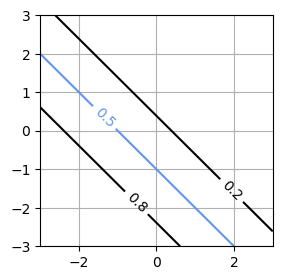

In [30]:
# List 6-2-8

# 모델 등고선 2D 표시 ---
def show_contour_logistic2(w):
    xn = 30  # 매개 변수의 분할 수
    x0 = np.linspace(X_range0[0], X_range0[1], xn)  # X_range0 범위 내에 30개의 균등한 값 생성
    x1 = np.linspace(X_range1[0], X_range1[1], xn)  # X_range1 범위 내에 30개의 균등한 값 생성
    xx0, xx1 = np.meshgrid(x0, x1)  # x0와 x1의 그리드 생성
    y = logistic2(xx0, xx1, w)  # 로지스틱 함수 적용하여 y 값 계산
    cont = plt.contour(xx0, xx1, y, levels=(0.2, 0.5, 0.8),  # 등고선 플롯 생성, 레벨은 0.2, 0.5, 0.8
                       colors=['k', 'cornflowerblue', 'k'])  # 등고선 색상 설정
    cont.clabel(fmt='%1.1f', fontsize=10)  # 등고선 레이블 표시
    plt.grid(True)  # 격자 표시

# test ---
plt.figure(figsize=(3, 3))  # 그림 크기 설정
W = [-1, -1, -1]  # 로지스틱 회귀 모델의 가중치
show_contour_logistic2(W)  # 등고선 플롯 표시

![스크린샷 2024-07-12 01.27.53.png](<attachment:스크린샷 2024-07-12 01.27.53.png>)

- 1-of-k 부호화를 사용하는데, 2 클래스 분류 문제이므로 T의 0열째  $t_{n0}$을 $t_n$로 두고 1이면 클래스 0, 0이면 클래스 1로 처리
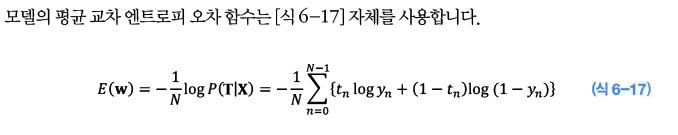

In [34]:
# List 6-2-9

# 크로스 엔트로피 오차를 계산하는 함수 정의
# 크로스 엔트로피 오차 ---
def cee_logistic2(w, x, t):
    X_n = x.shape[0]  # 데이터의 수 (N)
    y = logistic2(x[:, 0], x[:, 1], w)  # 로지스틱 회귀 모델의 예측 값 계산
    cee = 0  # 교차 엔트로피 오차 초기화
    for n in range(len(y)):  # 각 데이터 포인트에 대해
        cee = cee - (t[n, 0] * np.log(y[n]) + (1 - t[n, 0]) * np.log(1 - y[n]))
                # 교차 엔트로피 오차 계산 및 누적
    cee = cee / X_n  # 평균 교차 엔트로피 오차로 나눔
    return cee  # 교차 엔트로피 오차 반환

![스크린샷 2024-07-12 01.31.29.png](<attachment:스크린샷 2024-07-12 01.31.29.png>)
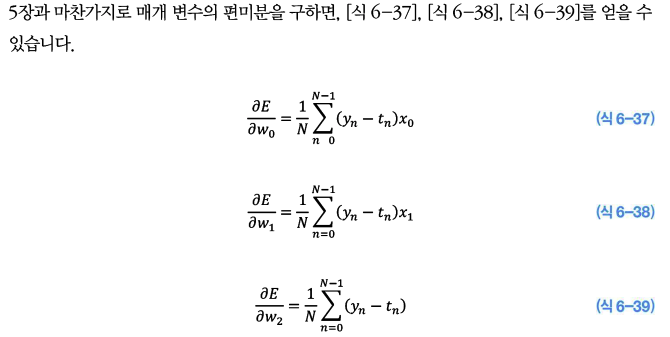

In [35]:
# List 6-2-10

# 편미분을 계산하는 함수를 정의 
# 실행하면 W=[-1, -1, -1]의 경우 편미분값이 반환됨

def dcee_logistic2(w, x, t):
    X_n = x.shape[0]  # 데이터의 수 (N)
    y = logistic2(x[:, 0], x[:, 1], w)  # 로지스틱 회귀 모델의 예측 값 계산
    dcee = np.zeros(3)  # 기울기 값을 저장할 배열 초기화
    for n in range(len(y)):  # 각 데이터 포인트에 대해
        dcee[0] = dcee[0] + (y[n] - t[n, 0]) * x[n, 0]  # w0에 대한 기울기 계산 및 누적
        dcee[1] = dcee[1] + (y[n] - t[n, 0]) * x[n, 1]  # w1에 대한 기울기 계산 및 누적
        dcee[2] = dcee[2] + (y[n] - t[n, 0])  # w2에 대한 기울기 계산 및 누적
    dcee = dcee / X_n  # 평균 기울기로 나눔
    return dcee  # 기울기 반환

# test ---
W = [-1, -1, -1]  # 로지스틱 회귀 모델의 초기 가중치
dcee_logistic2(W, X, T2)  # 기울기 계산 함수 호출

array([ 0.10272008,  0.04450983, -0.06307245])

w0 = -3.70, w1 = -2.54, w2 = -0.28
CEE =0.22


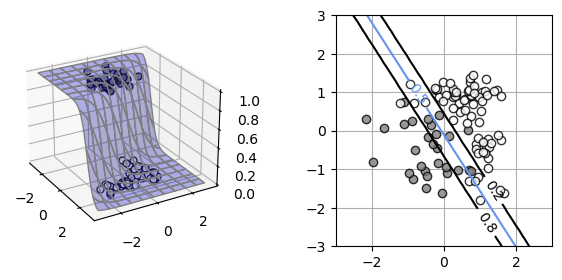

In [36]:
# List 6-2-11

from scipy.optimize import minimize

# 마지막으로 평균 교차 엔트로피 오차가 최소가 되도록 로지스틱 회귀 모델의 매개 변수를 구하고 그 결과를 표시
# 로지스틱 회귀 모델의 매개 변수 검색 ---
def fit_logistic2(w_init, x, t):
    # 교차 엔트로피 오차를 최소화하는 가중치를 찾기 위한 최적화
    res = minimize(cee_logistic2, w_init, args=(x, t),
                   jac=dcee_logistic2, method="CG")
    return res.x  # 최적화된 가중치 반환

# Main ---
plt.figure(1, figsize=(7, 3))  # 그림 크기 설정
plt.subplots_adjust(wspace=0.5)  # 서브플롯 간 간격 조정

Ax = plt.subplot(1, 2, 1, projection='3d')  # 3D 서브플롯 생성
W_init = [-1, 0, 0]  # 초기 가중치 설정
W = fit_logistic2(W_init, X, T2)  # 로지스틱 회귀 모델의 최적 가중치 찾기
print("w0 = {0:.2f}, w1 = {1:.2f}, w2 = {2:.2f}".format(W[0], W[1], W[2]))  # 최적화된 가중치 출력
show3d_logistic2(Ax, W)  # 로지스틱 회귀 모델 시각화

show_data2_3d(Ax, X, T2)  # 데이터 시각화
cee = cee_logistic2(W, X, T2)  # 최적화된 가중치를 사용한 교차 엔트로피 오차 계산
print("CEE ={0:.2f}".format(cee))  # 교차 엔트로피 오차 출력

Ax = plt.subplot(1, 2, 2)
show_data2(X, T2)
show_contour_logistic2(W)
plt.show()

- 앞 절과 마찬가지로 minimize()에 미분 함수도 전달하여 켤레 기울기법으로 매개변수를 구했다

    - 켤레 기울기법(Conjugate Gradient Method)은 대규모 선형 방정식 시스템이나 이차형태의 최적화를 푸는 데 사용되는 효율적인 최적화 알고리즘 > 이 방법은 특히 차원이 높은 문제에서 효과적
        
        - 목적: 함수 ( f(x) )를 최소화하는 ( x )를 찾는 것. 이 함수는 일반적으로 이차 함수(즉, 2차형태)

        - 반복적인 방법으로, 기울기(gradient)를 이용하여 목적 함수의 최소점을 찾는다. 일반적인 경사 하강법과 달리, 켤레 기울기법은 이전의 탐색 방향을 고려하여 다음 탐색 방향을 결정한다.

    
- 그림과 같이 분포를 분리하는 곳에 결정 경계가 그려짐
- 사용된 로지스틱 회귀 모델의 시그모이드 함수 내용은 면 모델 > 이 면은 시그모이드 함수에 의해 0과 1의 사이에 들어감
- 평면을 넣었을 뿐, 결정 경계는 반드시 직선이 됨

![스크린샷 2024-07-12 01.43.36.png](<attachment:스크린샷 2024-07-12 01.43.36.png>)
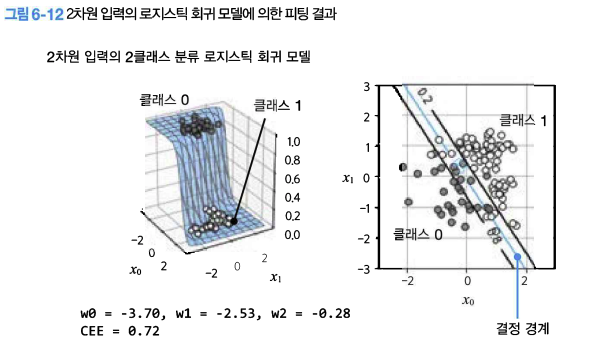

## 6.3 2차원 입력 3클래스 분류

### 6.3.1. 3클래스 분류 로지스틱 회귀 모델



![스크린샷 2024-07-12 01.44.11.png](<attachment:스크린샷 2024-07-12 01.44.11.png>)
![스크린샷 2024-07-12 01.44.31.png](<attachment:스크린샷 2024-07-12 01.44.31.png>)

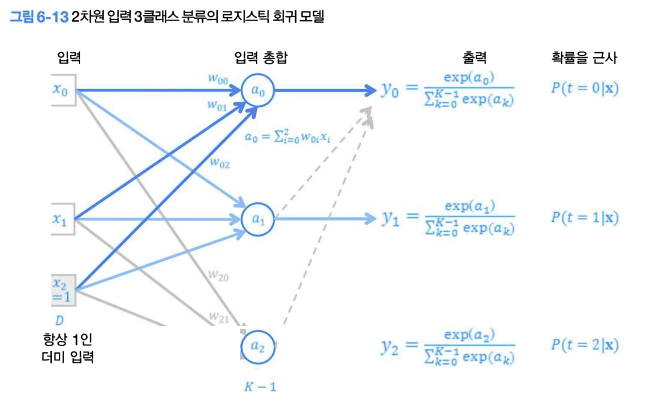
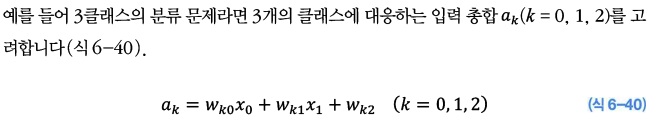

- $w_{ki}$는 입력 $x_i$에서 클래스 $k$의 입력 총합을 조절하는 매개 변수

- 2차원 입력을 고려하기에 $x=[x_0, x_1]$이지만, 항상 1을 갖는 세 번째 입력 $x_2=1$을 가정하여 아래와 같이 표현

![스크린샷 2024-07-12 01.47.15.png](<attachment:스크린샷 2024-07-12 01.47.15.png>)

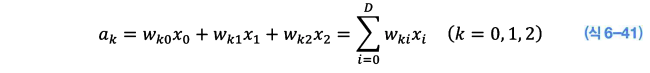

![스크린샷 2024-07-12 01.47.42.png](<attachment:스크린샷 2024-07-12 01.47.42.png>)

- K는 분류할 클래스의 수 표현 > K = 3으로 가정

![스크린샷 2024-07-12 01.48.11.png](<attachment:스크린샷 2024-07-12 01.48.11.png>)
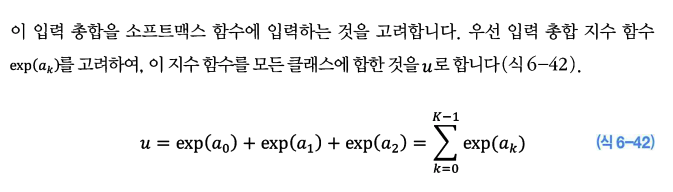
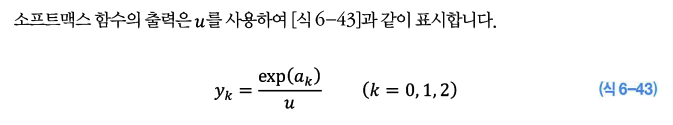

이 모델을 그림으로 그리면

![스크린샷 2024-07-12 01.50.00.png](<attachment:스크린샷 2024-07-12 01.50.00.png>)

- 모델의 입력 : $x={x_0, x_1, x_2}$ > $x_2=1$

- 모델의 출력 : $y = [y_0, y_1, y_2]$로, 항상 $y_0 + y_1 + y_2 = 1$이 보장 (확률이므로)

- 모델의 매개 변수 : $w_{ki} (k=0,1,2, i=0,1,2)$


$W = \begin{bmatrix}
w_{00} & w_{10} & w_{20} \\
w_{01} & w_{11} & w_{21} \\
w_{02} & w_{12} & w_{22}
\end{bmatrix}
$

이 모델의 출력 $y_0, y_1, y_2$는 

각 클래스에 입력 $x$가 속할 확률 
- $P(T=[1,0,0]|x)$ (클래스 0)
- $P(T=[0,1,0]|x)$ (클래스 1)
- $P(T=[0,0,1]|x)$ (클래스 2)를 나타내도록 학습시킴

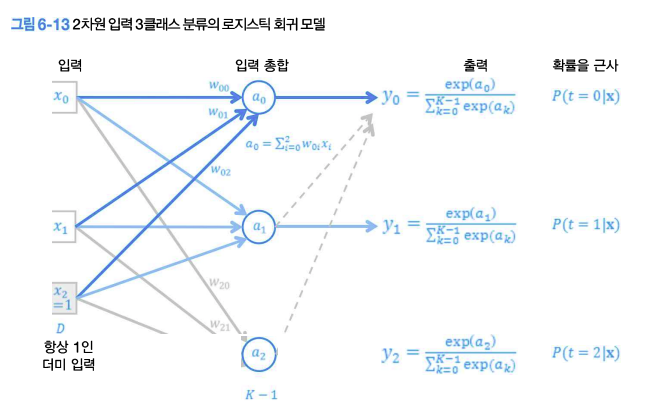

In [37]:
# List 6-2-12

# 3클래스용 로지스틱 회귀모델 logistic3 구현 ---
def logistic3(x0, x1, w):
    K = 3  # 클래스 수
    w = w.reshape((3, 3))  # 가중치를 3x3 행렬로 재구성
    n = len(x1)  # 데이터 포인트의 수
    y = np.zeros((n, K))  # 출력 배열 초기화
    for k in range(K):  # 각 클래스에 대해 반복
        y[:, k] = np.exp(w[k, 0] * x0 + w[k, 1] * x1 + w[k, 2])  # 각 클래스의 지수 함수 계산
    wk = np.sum(y, axis=1)  # 각 데이터 포인트에 대해 y의 합 계산
    wk = y.T / wk  # 각 클래스의 확률 계산 (정규화)
    y = wk.T  # 결과를 y에 저장
    return y  # 출력 반환

# test ---
W = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9])  # 가중치 배열
y = logistic3(X[:3, 0], X[:3, 1], W)  # 함수 호출
print(np.round(y, 3))  # 결과 출력 (소수점 3자리로 반올림)  


[[0.    0.006 0.994]
 [0.965 0.033 0.001]
 [0.925 0.07  0.005]]


- 이 모델의 매개 변수 W의 요소 수 : 9개

- minimize에 대응하기 위해 입력 W는 3x3 행렬을 늘어놓은 요소 수 9개의 벡터로 취급

- test에서 위부터 3개의 입력 데이터 X[:3, 0]과 시험적으로 결정한 W에 대한 출력을 확인

- 출력은 Nx3의 행렬로 표현한 y로, 같은 라인의 요소(가로 줄의 수)를 더하면 1이 됨

	- Nx3 행렬: 출력 y는 N개의 데이터 포인트에 대해 3개의 클래스 확률을 가지므로, Nx3 크기의 행렬입니다. 여기서 N은 입력 데이터 포인트의 수를 의미
	
	- 같은 라인의 요소를 더하면 1이 됨: 출력 행렬 y의 각 행은 해당 데이터 포인트가 각 클래스에 속할 확률을 나타냅니다. 각 행의 확률값을 모두 더하면 1이 됨 > 이는 각 데이터 포인트가 반드시 세 가지 클래스 중 하나에 속해야 하므로 확률의 총합이 1이 되어야 함을 의미합니다.


	???


### 6.3.2. 교차 엔트로피 오차



- 가능도는 모든 입력 데이터 $x$에 대해서 전체 클래스 데이터 $T$가 생성된 확률

- 한 입력 데이터 $x$에 주목하여 그 클래스가 $T = [1, 0, 0]$인 경우, 그 클래스가 생성된 확률은 아래와 같다.

![스크린샷 2024-07-12 02.03.22.png](<attachment:스크린샷 2024-07-12 02.03.22.png>)

- 클래스가 $T = [0, 1, 0]$인 경우, 그 확률은 아래와 같다

![스크린샷 2024-07-12 02.03.54.png](<attachment:스크린샷 2024-07-12 02.03.54.png>)

- 위 식을 어떤 클래스에서든 동일한 수식으로 표현하려면 아래가 된다.

![스크린샷 2024-07-12 02.04.25.png](<attachment:스크린샷 2024-07-12 02.04.25.png>)

- 예를 들어 클래스가 $T = [t_0, t_1, t_2] = [0, 1, 0]$이라면 아래와 같이 $y_1$을 추출할 수 있다.

![스크린샷 2024-07-12 02.05.09.png](<attachment:스크린샷 2024-07-12 02.05.09.png>)

- 모든 $N$개의 데이터가 생성된 확률은, 이 확률을 모든 데이터에 곱하면 되며 아래와 같다.

![스크린샷 2024-07-12 02.05.32.png](<attachment:스크린샷 2024-07-12 02.05.32.png>)

- 평균 교차 엔트로피 오차 함수는 가능도의 음의 대수의 평균

![스크린샷 2024-07-12 02.05.50.png](<attachment:스크린샷 2024-07-12 02.05.50.png>)

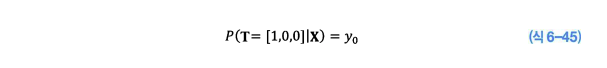
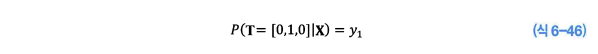
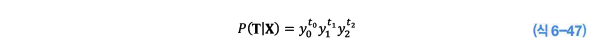
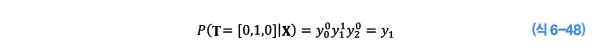
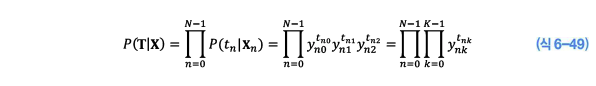
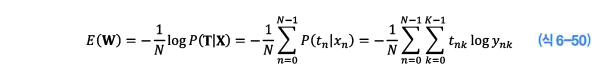

In [38]:
# List 6-2-13

# 교차 엔트로피 오차 ---
def cee_logistic3(w, x, t):
    X_n = x.shape[0]  # 데이터의 수 (N)
    y = logistic3(x[:, 0], x[:, 1], w)  # 로지스틱 회귀 모델의 예측 값 계산
    cee = 0  # 교차 엔트로피 오차 초기화
    N, K = y.shape  # 출력의 행렬 크기 (N: 데이터 수, K: 클래스 수)
    for n in range(N):  # 각 데이터 포인트에 대해
        for k in range(K):  # 각 클래스에 대해
            cee = cee - (t[n, k] * np.log(y[n, k]))  # 교차 엔트로피 오차 계산 및 누적
    cee = cee / X_n  # 평균 교차 엔트로피 오차로 나눔
    return cee  # 교차 엔트로피 오차 반환

# test ---
W = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9])  # 가중치 배열
cee_logistic3(W, X, T3)  # 함수 호출

3.9824582404787288

- 9개 요소 배열 W와 X, T3을 인수로 스칼라 값을 출력

### 6.3.3. 경사 하강법에 의한 해

- 경사 하강법으로 E(W)를 최소화하는 W를 구하려면, E(W)의 각각 $w_{ki}$에 관한 편미분이 필요

![스크린샷 2024-07-12 02.08.49.png](<attachment:스크린샷 2024-07-12 02.08.49.png>)

- 모든 $k$와 $i$에 대해 도일한 형태가 됨

- 이를 도출하기 위해 소프트맥스 함수의 미분 계산이 포함됨
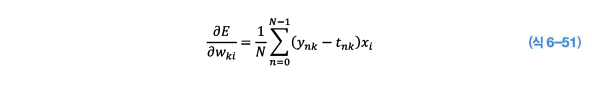

In [39]:
# List 6-2-14
# 교차 엔트로피 오차의 미분 ---
def dcee_logistic3(w, x, t):    # 교차 엔트로피 오차의 미분값 출력
    X_n = x.shape[0]
    y = logistic3(x[:, 0], x[:, 1], w)
    dcee = np.zeros((3, 3))  # (클래스의 수 K) x (x의 차원 D+1)
    N, K = y.shape
    for n in range(N):
        for k in range(K):
            dcee[k, :] = dcee[k, :] - (t[n, k] - y[n, k])*np.r_[x[n, :], 1]
    dcee = dcee / X_n
    return dcee.reshape(-1)

# test ---
W = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9])
dcee_logistic3(W, X, T3)

array([ 0.03778433,  0.03708109, -0.1841851 , -0.21235188, -0.44408101,
       -0.38340835,  0.17456754,  0.40699992,  0.56759346])

- 출력 $\frac{\partial E}{\partial w_{ki}}$에 대응한 요소 수 9개의 배열

In [40]:
# List 6-2-15

# minimize()에 전달하여 매개 변수 검색을 수행하는 함수 만듦
# 매개 변수 검색 ---
def fit_logistic3(w_init, x, t):
    res = minimize(cee_logistic3, w_init, args=(x, t), jac=dcee_logistic3, method="CG")
    return res.x

In [45]:
# List 6-2-16

# 모델 등고선 2D 표시 ---
def show_contour_logistic3(w):
    xn = 30  # 매개 변수의 분할 수
    x0 = np.linspace(X_range0[0], X_range0[1], xn)
    x1 = np.linspace(X_range1[0], X_range1[1], xn)

    xx0, xx1 = np.meshgrid(x0, x1)
    y = np.zeros((xn, xn, 3))
    for i in range(xn):
        wk = logistic3(xx0[:, i], xx1[:, i], w)
        for j in range(3):
            y[:, i, j] = wk[:, j]
    for j in range(3):
        cont = plt.contour(xx0, xx1, y[:, :, j],levels=(0.5, 0.9), colors=['cornflowerblue', 'k'])
        cont.clabel(fmt='%1.1f', fontsize=9)
    plt.grid(True)
    


- 위의 show_contour_logistic3은 가중치 매개 변수 w를 전달하면, 표시할 입력 공간을 30×30으로 분할하여 모든 입력에 대해 네트워크의 출력을 확인 

- 그 후 각각의 카테고리에서 0.5 또는 0.9 이상의 출력을 얻을 수 영역을 등고선으로 표시


In [ ]:
# List 6-2-17

# Main --- 
W_init = np.zeros((3, 3))
W = fit_logistic3(W_init, X, T3)
print(np.round(W.reshape((3, 3)), 2))
cee = cee_logistic3(W, X, T3)
print("CEE = {0:.2f}".format(cee))

plt.figure(figsize=(3, 3))
show_data2(X, T3)
show_contour_logistic3(W)
plt.show()


- 다 클래스 로지스틱 회귀 모델에서는 클래스 간 경계선이 직선의 조합으로 구성

- 이 모델의 훌륭한 점은 모호성을 조건부 확률(사후 확률)로 근사하는 것에 있음

![스크린샷 2024-07-12 02.21.51.png](<attachment:스크린샷 2024-07-12 02.21.51.png>)
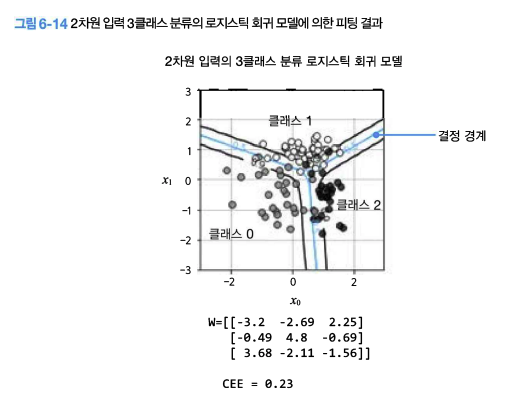